In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import pathlib
import matplotlib.pyplot as plt
import gzip
import scipy.sparse as sparse
import pickle

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Define the figure size and dpi
fig_width = 6.9  # inches
fig_height = 3.5  # inches
fig_dpi = 300

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,
    
    # Fonts
    'font.size': 10,
    
    # Axes
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'axes.linewidth': 0.5,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'grid.color': 'gray',
    
    # Legend
    'legend.fontsize': 8,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,
    
    # Lines
   'lines.linewidth': 1.0, # set the default linewidth for plot lines to 1.0 points
   'lines.markersize': 4, # set the default marker size for plot markers to 6 points
    
    'axes.labelsize': 10, # set the font size of the axis labels to 10 points
    'axes.titlesize': 12, # set the font size of the plot title to 12 points
    'xtick.labelsize': 8, # set the font size of the x-axis tick labels to 8 points
    'ytick.labelsize': 8, # set the font size of the y-axis tick labels to 8 points
})

In [3]:
results_etas = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/gFedNTM/experiments/centralized/results/eta_variable/results.pickle")
results_frozen = pathlib.Path("/export/usuarios_ml4ds/lbartolome/Repos/my_repos/gFedNTM/experiments/centralized/results/frozen_variable/results.pickle")

In [4]:
with open(results_etas, 'rb') as f:
    df_etas = pickle.load(f)

In [5]:
df_etas

,centralized_betas_mean,centralized_betas_std,centralized_thetas_mean,centralized_thetas_std,non_colab_betas_mean,non_colab_betas_std,non_colab_thetas_mean,non_colab_thetas_std,baseline_betas_mean,baseline_betas_std,baseline_thetas_mean,baseline_thetas_std
Eta,,,,,,,,,,,,
0.01,8.679160,0.041948,2555.489177,37.551150,7.571110,0.047695,3066.701683,14.020916,3.564251,0.097520,834.597401,4.472109
0.02,12.205299,0.043540,2523.539942,33.482734,11.675974,0.046093,3033.457841,26.091543,4.739023,0.074169,835.339897,3.147298
0.03,14.747114,0.052812,2464.099297,19.939525,14.505136,0.053869,3030.579004,17.118892,5.965090,0.046665,834.424584,4.103151
0.04,16.811823,0.046112,2419.768682,30.561096,16.708761,0.050497,3033.316895,23.466785,7.198343,0.058371,834.070568,3.194427
0.08,22.671127,0.036850,2381.083679,30.670862,22.665637,0.037210,3009.165021,14.715634,11.619100,0.047014,833.173112,3.668596
1.00,44.302110,0.012242,2783.379186,50.088522,44.302110,0.012242,3348.511025,86.254836,39.659692,0.017714,835.080727,2.754902


In [6]:
with open(results_frozen, 'rb') as f:
    df_frozen = pickle.load(f)

In [7]:
df_frozen

,centralized_betas_mean,centralized_betas_std,centralized_thetas_mean,centralized_thetas_std,non_colab_betas_mean,non_colab_betas_std,non_colab_thetas_mean,non_colab_thetas_std,baseline_betas_mean,baseline_betas_std,baseline_thetas_mean,baseline_thetas_std
Nr frozen topics,,,,,,,,,,,,
5,8.675956,0.048959,2607.290116,34.929018,7.206668,0.058355,3482.298476,15.111687,3.557423,0.085961,766.793222,5.688556
10,8.685301,0.042677,2566.510136,29.408259,7.584254,0.052375,3069.153412,19.457019,3.615306,0.096450,832.867409,3.179139
15,8.651045,0.052357,2509.904259,38.766095,7.835362,0.053515,2809.819631,17.577961,3.563429,0.072135,825.315582,2.020317
20,8.659486,0.043955,2505.960224,29.780421,8.039820,0.062527,2630.502140,20.994396,3.580147,0.072882,793.978342,2.201287
25,8.657862,0.040172,2476.046329,19.587771,8.194853,0.043186,2490.363576,16.298050,3.552750,0.089258,761.560153,1.838899
30,8.660672,0.057872,2415.269865,26.981829,8.307286,0.067937,2415.735773,19.755355,3.600174,0.101840,729.364628,1.410503
35,8.689439,0.037379,2418.126323,18.751139,8.421679,0.036046,2370.652872,19.105381,3.580790,0.064954,699.953093,0.993933
40,8.663589,0.037246,2399.476612,25.951640,8.475184,0.045925,2348.399123,16.358895,3.574953,0.077813,672.532114,1.152649


In [8]:
df_etas.columns

Index(['centralized_betas_mean', 'centralized_betas_std',
       'centralized_thetas_mean', 'centralized_thetas_std',
       'non_colab_betas_mean', 'non_colab_betas_std', 'non_colab_thetas_mean',
       'non_colab_thetas_std', 'baseline_betas_mean', 'baseline_betas_std',
       'baseline_thetas_mean', 'baseline_thetas_std'],
      dtype='object')

In [9]:
# select the mean columns for betas and the corresponding std columns
betas_means = df_etas.filter(regex='betas_mean')
betas_stds = df_etas.filter(regex='betas_std')

# select the mean columns for thetas and the corresponding std columns
thetas_means = df_etas.filter(regex='thetas_mean')[['centralized_thetas_mean','non_colab_thetas_mean']]
thetas_stds = df_etas.filter(regex='thetas_std')[['centralized_thetas_std','non_colab_thetas_std']]

In [12]:
# select the mean columns for betas and the corresponding std columns
betas_means2 = df_frozen.filter(regex='betas_mean')
betas_stds2 = df_frozen.filter(regex='betas_std')

# select the mean columns for thetas and the corresponding std columns
thetas_means2 = df_frozen.filter(regex='thetas_mean')[['centralized_thetas_mean','non_colab_thetas_mean']]
thetas_stds2 = df_frozen.filter(regex='thetas_std')[['centralized_thetas_std','non_colab_thetas_std']]

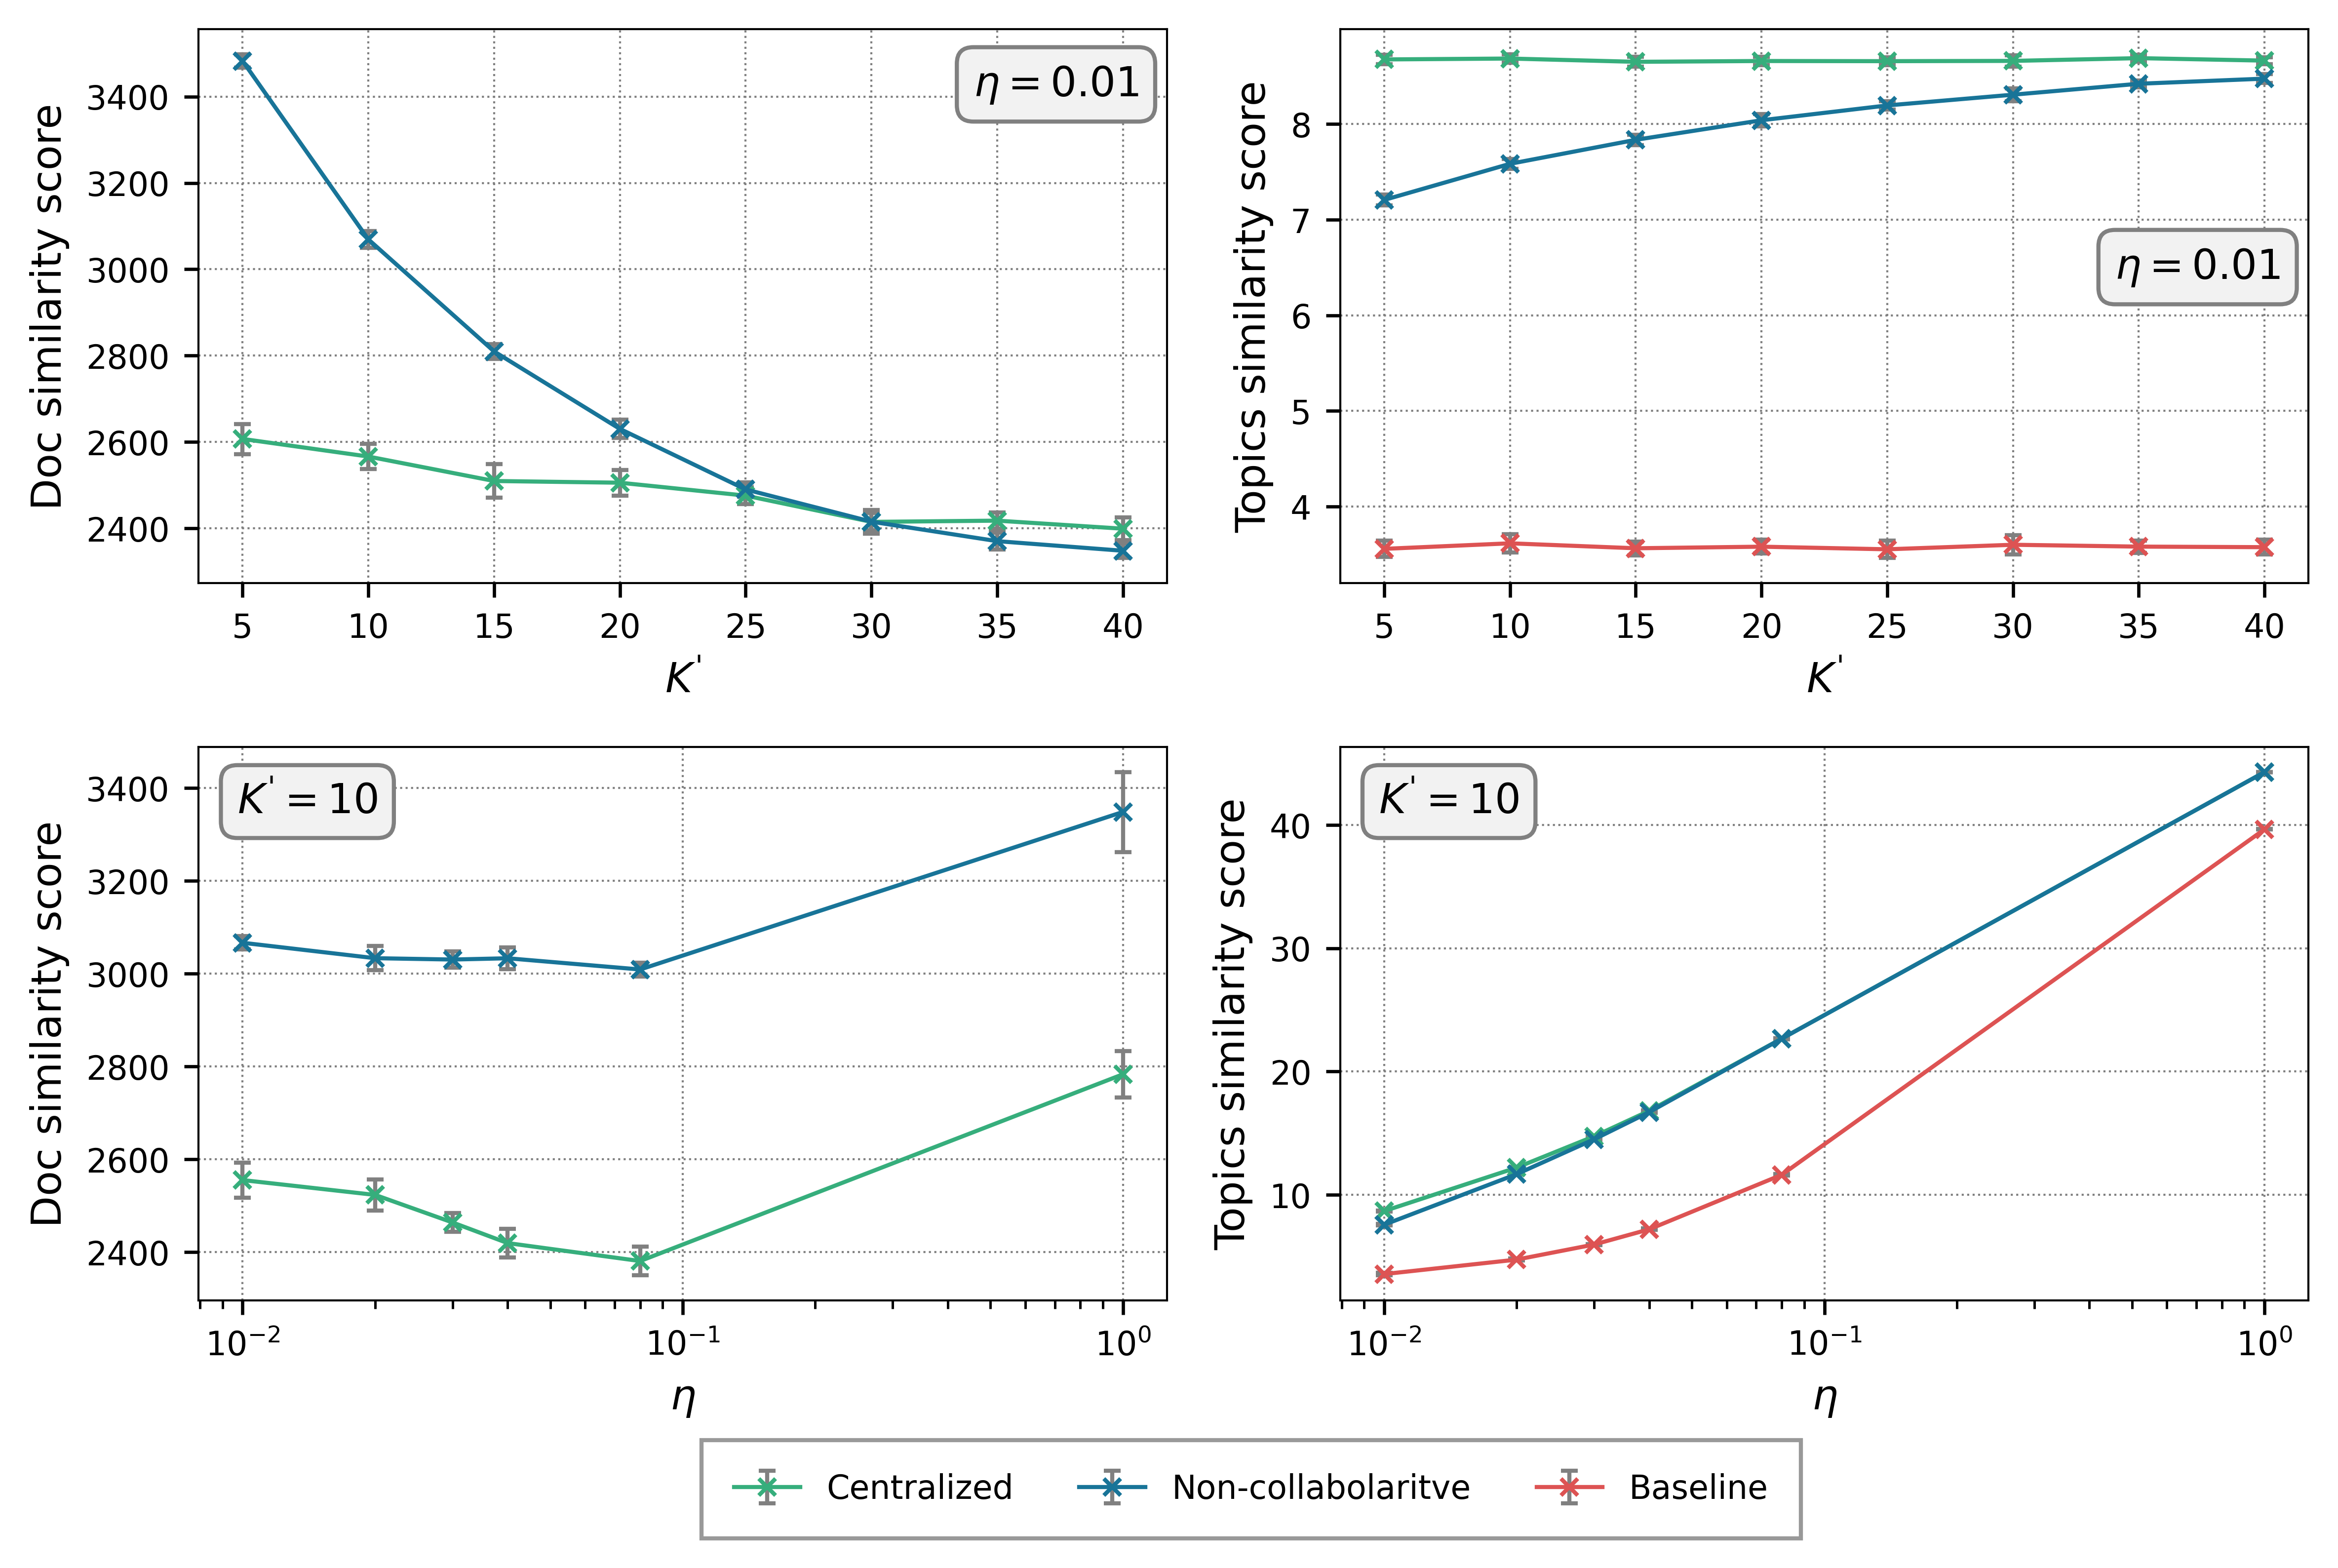

In [11]:
labels = ["Centralized", "Non-collabolaritve", "Baseline"]
colors = ["#36AE7C", "#187498", "#DD5353"]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 5)) #height of 4 inches and a width of 6 inches
(ax4, ax3), (ax2, ax1)  = axs

# bottom right
for col_i in range(len(betas_means.columns)):
    ax1.errorbar(betas_means.index,
                 betas_means[betas_means.columns[col_i]],
                 yerr=betas_stds[betas_stds.columns[col_i]],
                 fmt='x-',
                 label=labels[col_i],
                 color=colors[col_i],
                 ecolor='gray',
                 capsize=2,
                 lw=1)
ax1.text(0.04, 0.88, r"$K^'=10$", transform=ax1.transAxes,
         bbox=dict(facecolor='#F2F2F2', edgecolor='gray', boxstyle='round,pad=0.4'))
ax1.set_xscale('log') # set the x-axis to logarithmic scale
ax1.set_xlabel(r'$\eta$')
ax1.set_ylabel('Topics similarity score')
ax1.grid(True) # add a grid

# bottom left
for col_i in range(len(thetas_means.columns)):
    ax2.errorbar(thetas_means.index,
                 thetas_means[thetas_means.columns[col_i]],
                 yerr=thetas_stds[thetas_stds.columns[col_i]],
                 fmt='x-',
                 label=labels[col_i],
                 color=colors[col_i],
                 ecolor='gray',
                 capsize=2,
                 lw=1)
ax2.text(0.04, 0.88, r"$K^'=10$", transform=ax2.transAxes,
         bbox=dict(facecolor='#F2F2F2', edgecolor='gray', boxstyle='round,pad=0.4'))
ax2.set_xscale('log') # set the x-axis to logarithmic scale
ax2.set_xlabel(r'$\eta$')
ax2.set_ylabel('Doc similarity score')
ax2.grid(True) # add a grid

# top right
for col_i in range(len(betas_means2.columns)):
    ax3.errorbar(betas_means2.index,
                 betas_means2[betas_means2.columns[col_i]],
                 yerr=betas_stds2[betas_stds2.columns[col_i]],
                 fmt='x-',
                 label=labels[col_i],
                 color=colors[col_i],
                 ecolor='gray',
                 capsize=2,
                 lw=1)
ax3.text(0.8, 0.55, r"$\eta=0.01$", transform=ax3.transAxes,
         bbox=dict(facecolor='#F2F2F2', edgecolor='gray', boxstyle='round,pad=0.4'))
ax3.set_xlabel(r"$K^'$")#set_xlabel('Number of common topics')
ax3.set_xticks(thetas_means2.index.values)
ax3.set_ylabel('Topics similarity score')
ax3.grid(True) # add a grid

# top left
for col_i in range(len(thetas_means2.columns)):
    ax4.errorbar(thetas_means2.index,
                 thetas_means2[thetas_means2.columns[col_i]],
                 yerr=thetas_stds2[thetas_stds2.columns[col_i]],
                 fmt='x-',
                 label=labels[col_i],
                 color=colors[col_i],
                 ecolor='gray',
                 capsize=2,
                 lw=1)
ax4.text(0.8, 0.88, r"$\eta=0.01$", transform=ax4.transAxes,
         bbox=dict(facecolor='#F2F2F2', edgecolor='gray', boxstyle='round,pad=0.4'))
ax4.set_xlabel(r"$K^'$")#set_xlabel('Number of common topics')
ax4.set_xticks(thetas_means2.index.values)
ax4.set_ylabel('Doc similarity score')
ax4.grid(True) # add a grid
# Add the legend outside the figure
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.535, -0.06), ncol=3, frameon=True, borderpad=1, labelspacing=1)
for ax in (ax1, ax2):
    ax.grid(True, axis='y')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
save_fig = "/export/usuarios_ml4ds/lbartolome/Repos/my_repos/gFedNTM/experiments/centralized/results/Images/exp_centr.png"
fig.savefig(save_fig, dpi='figure', bbox_inches='tight')